# Определение перспективного тарифа для телеком компании
**Проектная работа №3 Яндекс.Практикум - Data Science**

Спринт - Статистический Анализ Данных

## Описание проекта

**Исходные данные:**

У телеком компании «Мегалайн» два тарифных плана: «Смарт» и «Ультра». Даны данные за 2018 год по пользованию услугами связи 500 клиентов на этих тарифах.

**Цель проекта:**

Проанализировать поведение клиентов и сделать вывод — какой тариф приносит больше денег компании.

**Описание тарифов:**
* Тариф «Смарт»
    * Ежемесячная плата: 550 рублей
    * Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

* Тариф «Ультра»
    * Ежемесячная плата: 1950 рублей
    * Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    * Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей

### Структура проекта
* [1. Загрузка и изучение общей информации датасета](#start)
* [2. Предобработка данных](#preprocessing)
    * [2.1 Приведение к нужным типам и обработка пропущенных значений](#nan_types)
    * [2.2 Расчёт дополнительных параметров](#augmentation)
* [3. Анализ данных](#eda)
* [4. Проверка гипотез](#testing)
    * [4.1 Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается](#tariffs)
    * [4.2 Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов](#cities)
* [5. Общий вывод](#conclusion)

<a id="start"></a>
## 1. Загрузка и изучение общей информации датасета

#### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Отключим scientific notation

In [2]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)

#### Читаем файлы с данными

In [3]:
df_calls = pd.read_csv('../datasets/calls.csv', sep=',')
df_internet = pd.read_csv('../datasets/internet.csv', sep=',')
df_messages = pd.read_csv('../datasets/messages.csv', sep=',')
df_tariffs = pd.read_csv('../datasets/tariffs.csv', sep=',')
df_users = pd.read_csv('../datasets/users.csv', sep=',')

#### Изучим загруженные датасеты

In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000000,1000
1,1000_1,2018-08-17,0.000000,1000
2,1000_2,2018-06-11,2.850000,1000
3,1000_3,2018-09-21,13.800000,1000
4,1000_4,2018-12-15,5.180000,1000


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950000,2018-11-25,1000
1,1,1000_1,1052.810000,2018-09-07,1000
2,2,1000_2,1197.260000,2018-06-25,1000
3,3,1000_3,550.270000,2018-08-22,1000
4,4,1000_4,302.560000,2018-09-24,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [11]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
df_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Выведем в удобном формате число звонков, интернет сессий и сообщений

In [14]:
len_dataframes = pd.Series(
    data=[df_users.shape[0], df_calls.shape[0], df_internet.shape[0], df_messages.shape[0]],
    index=['users', 'calls', 'internet', 'messages']
)
len_dataframes

users          500
calls       202607
internet    149396
messages    123036
dtype: int64

#### Выводы:
* определили объём и формат данных:
    * 500 клиентов
    * 202607 звонков
    * 149396 интернет сессий
    * 123036 сообщений
* пропущенные значения отсутствуют (кроме параметра churn_date в таблице users, который принимает значение NaN, если тариф действующий)
* необходимо будет округлить значения истраченного трафика и длительности звонка в соответствиями с уловиями тарифов телеком компании

<a id="preprocessing"></a>
## 2. Предобработка данных

<a id="nan_types"></a>
### 2.1 Приведение к нужным типам и обработка пропущенных значений

#### Обработаем таблицу calls (информация о звонках)

Необходимо преобразовать столбец call_date к типу datetime

In [15]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format='%Y-%m-%d')

По условиям тарифа округлим до бОльшего целого значения истраченного трафика в каждой сессии

In [16]:
df_calls.loc[:, 'duration'] = df_calls.loc[:, 'duration'].apply(lambda x: math.ceil(x))
df_calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Избавимся от строк в которых продолжительность звонка 0.0. Такие звонки не идут в учёт потраченных минут в тарифе и не оплачиваются, не будем искажать число звонков пропущенными вызовами

In [17]:
df_calls = df_calls[df_calls['duration'] > 0.0].reset_index()

#### Обработаем таблицу internet (информация об интернет-сессиях)

Удалим лишнюю столбец дублирующий индекс 'Unnamed: 0'

In [18]:
del df_internet['Unnamed: 0']

Необходимо преобразовать столбец session_date к типу datetime

In [19]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format='%Y-%m-%d')

По условиям тарифа округлим до бОльшего целого значения истраченного трафика в каждой сессии

In [20]:
df_internet.loc[:, 'mb_used'] = df_internet.loc[:, 'mb_used'].apply(lambda x: math.ceil(x))

Проверим есть ли строки с 0 значением использованного трафика

In [21]:
print('Количество строк с пропущенными звонками:', df_internet[df_internet['mb_used'] == 0.0].shape[0])

Количество строк с пропущенными звонками: 19598


Не будем никак обрабатывать строки 0 значением трафика, так как он всё равно не будет учтён при суммировании.

In [22]:
df_internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


#### Обработаем таблицу messages (информация о сообщениях)

Необходимо преобразовать столбец message_date к типу datetime

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format='%Y-%m-%d')

#### Обработаем таблицу tariffs (информация о тарифах)

Имеется всего 2 строки (2 тарифа), отсутствуют пропущенные значения и установленные типы данных правильные

In [24]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Обработаем таблицу users (информация о пользователях)

Пропущенные значения сhurn_date означают, что тариф ещё действовал на момент выгрузки данных

In [25]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format='%Y-%m-%d')

Выведем получившиеся размеры датасетов после обработки

In [26]:
len_dataframes = pd.Series(
    data=[df_users.shape[0], df_calls.shape[0], df_internet.shape[0], df_messages.shape[0]],
    index=['users', 'calls', 'internet', 'messages']
)
len_dataframes

users          500
calls       162994
internet    149396
messages    123036
dtype: int64

<a id="augmentation"></a>
### 2.2 Расчёт дополнительных параметров

#### Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам

Для начала добавим новые столбцы определяющие месяц звонка

In [27]:
df_calls['call_month'] = df_calls['call_date'].values.astype('datetime64[M]')

In [28]:
df_calls

,index,id,call_date,duration,user_id,call_month
0,2,1000_2,2018-06-11,3,1000,2018-06-01
1,3,1000_3,2018-09-21,14,1000,2018-09-01
2,4,1000_4,2018-12-15,6,1000,2018-12-01
3,7,1000_7,2018-08-22,19,1000,2018-08-01
4,8,1000_8,2018-09-15,19,1000,2018-09-01
...,...,...,...,...,...,...
162989,202602,1499_215,2018-12-26,1,1499,2018-12-01
162990,202603,1499_216,2018-10-18,19,1499,2018-10-01
162991,202604,1499_217,2018-11-10,11,1499,2018-11-01
162992,202605,1499_218,2018-10-06,5,1499,2018-10-01


Теперь сгруппируем данные по месяцам для расчёта кол-ва звонков и минут

In [29]:
calls_month = df_calls.groupby(['user_id','call_month'])[['duration']].agg(['count','sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'calls_count', 'calls_duration']
calls_month.head(5)

,user_id,month,calls_count,calls_duration
0,1000,2018-05-01,17,159
1,1000,2018-06-01,28,172
2,1000,2018-07-01,41,340
3,1000,2018-08-01,42,408
4,1000,2018-09-01,46,466


Проверим, что общее кол-во звонков и потраченных минут совпадает в изначальной и полученной группированием таблицах

In [30]:
print('Общее коли-во истраченных минут:', sum(df_calls['duration']), ', кол-во звонков:', df_calls.shape[0])
print('Общее коли-во истраченных минут:', sum(calls_month['calls_duration']), ', кол-во звонков:', sum(calls_month['calls_count']))

Общее коли-во истраченных минут: 1450301 , кол-во звонков: 162994
Общее коли-во истраченных минут: 1450301 , кол-во звонков: 162994


#### Посчитаем количество отправленных сообщений по месяцам

In [31]:
df_messages['message_month'] = df_messages['message_date'].values.astype('datetime64[M]')
messages_month = df_messages.groupby(['user_id','message_month'])[['id']].agg(['count']).reset_index()
messages_month.columns = ['user_id', 'month', 'messages']
messages_month

,user_id,month,messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
...,...,...,...
2712,1498,2018-10-01,42
2713,1499,2018-09-01,11
2714,1499,2018-10-01,48
2715,1499,2018-11-01,59


#### Посчитаем объём израсходованного интернет-трафика по месяцам

In [32]:
df_internet['session_month'] = df_internet['session_date'].values.astype('datetime64[M]')
internet_month = df_internet.groupby(['user_id','session_month'])[['mb_used']].agg(['sum']).reset_index()
internet_month.columns = ['user_id', 'month', 'mb_used']
internet_month

,user_id,month,mb_used
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016
3,1000,2018-08-01,14070
4,1000,2018-09-01,14581
...,...,...,...
3198,1498,2018-10-01,20604
3199,1499,2018-09-01,1848
3200,1499,2018-10-01,17809
3201,1499,2018-11-01,17984


Проверим, что общее кол-во звонков и потраченных минут совпадает в изначальной и полученной группированием таблицах

In [33]:
print(sum(df_internet['mb_used']))
print(sum(internet_month['mb_used']))

55369459
55369459


#### Посчитаем помесячную выручку с каждого пользователя

In [34]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Начнём с того, что выполним слияние таблиц по звонкам, сообщениям и интернет-трафику в одну общую таблицу

In [35]:
merged = pd.merge(calls_month, messages_month, how='outer', on=['user_id', 'month'])
merged = pd.merge(merged, internet_month, how='outer', on=['user_id', 'month'])
merged

,user_id,month,calls_count,calls_duration,messages,mb_used
0,1000,2018-05-01,17.000000,159.000000,22.000000,2256.000000
1,1000,2018-06-01,28.000000,172.000000,60.000000,23257.000000
2,1000,2018-07-01,41.000000,340.000000,75.000000,14016.000000
3,1000,2018-08-01,42.000000,408.000000,81.000000,14070.000000
4,1000,2018-09-01,46.000000,466.000000,57.000000,14581.000000
...,...,...,...,...,...,...
3209,1489,2018-10-01,NaN,NaN,21.000000,19588.000000
3210,1489,2018-11-01,NaN,NaN,20.000000,17516.000000
3211,1489,2018-12-01,NaN,NaN,35.000000,17341.000000
3212,1240,2018-02-01,NaN,NaN,NaN,961.000000


Теперь добавим к полученной таблице столбцы с тарифом и городом пользователя из таблицы df_users. Используем стратегию 'left', чтобы исключить пользователей которые не пользовались услугами телеком компании

In [36]:
df_full = pd.merge(merged, df_users[['user_id', 'tariff', 'city']], how='left', on=['user_id'])
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,tariff,city
0,1000,2018-05-01,17.000000,159.000000,22.000000,2256.000000,ultra,Краснодар
1,1000,2018-06-01,28.000000,172.000000,60.000000,23257.000000,ultra,Краснодар
2,1000,2018-07-01,41.000000,340.000000,75.000000,14016.000000,ultra,Краснодар
3,1000,2018-08-01,42.000000,408.000000,81.000000,14070.000000,ultra,Краснодар
4,1000,2018-09-01,46.000000,466.000000,57.000000,14581.000000,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,2018-10-01,NaN,NaN,21.000000,19588.000000,smart,Санкт-Петербург
3210,1489,2018-11-01,NaN,NaN,20.000000,17516.000000,smart,Санкт-Петербург
3211,1489,2018-12-01,NaN,NaN,35.000000,17341.000000,smart,Санкт-Петербург
3212,1240,2018-02-01,NaN,NaN,NaN,961.000000,ultra,Воронеж


Заполним пропуски посчитанных значений нулями

In [37]:
df_full[['calls_count', 'calls_duration', 'messages', 'mb_used']] = df_full[['calls_count', 'calls_duration', 'messages', 'mb_used']].fillna(0.0).astype('int')
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,tariff,city
0,1000,2018-05-01,17,159,22,2256,ultra,Краснодар
1,1000,2018-06-01,28,172,60,23257,ultra,Краснодар
2,1000,2018-07-01,41,340,75,14016,ultra,Краснодар
3,1000,2018-08-01,42,408,81,14070,ultra,Краснодар
4,1000,2018-09-01,46,466,57,14581,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,2018-10-01,0,0,21,19588,smart,Санкт-Петербург
3210,1489,2018-11-01,0,0,20,17516,smart,Санкт-Петербург
3211,1489,2018-12-01,0,0,35,17341,smart,Санкт-Петербург
3212,1240,2018-02-01,0,0,0,961,ultra,Воронеж


Посчитаем выручку с каждого клиента за каждый месяц и добавим в общую таблицу

In [38]:
# Функция возвращает значение выручки в зависимости от тарифа (какой-то жуткий монстр)
# Считается стоимость потраченных минут/сообщений/трафика сверх тарифа и прибавляется базовая стоимость тарифа
def calc_earnings(row):
    tariff_cond = df_tariffs['tariff_name'] == row['tariff']
    
    return (
    max(0, row['calls_duration'] - df_tariffs.loc[tariff_cond, 'minutes_included'].iloc[0]) * df_tariffs.loc[tariff_cond, 'rub_per_minute'].iloc[0]
    + max(0, row['messages'] - df_tariffs.loc[tariff_cond, 'messages_included'].iloc[0]) * df_tariffs.loc[tariff_cond, 'rub_per_message'].iloc[0]
    + max(0, row['mb_used'] - df_tariffs.loc[tariff_cond, 'mb_per_month_included'].iloc[0]) * (df_tariffs.loc[tariff_cond, 'rub_per_gb'].iloc[0] / 1024.0)
    + df_tariffs.loc[tariff_cond, 'rub_monthly_fee'].iloc[0]
    )

In [39]:
df_full['earnings'] = df_full.apply(calc_earnings, axis=1)
df_full

,user_id,month,calls_count,calls_duration,messages,mb_used,tariff,city,earnings
0,1000,2018-05-01,17,159,22,2256,ultra,Краснодар,1950.000000
1,1000,2018-06-01,28,172,60,23257,ultra,Краснодар,1950.000000
2,1000,2018-07-01,41,340,75,14016,ultra,Краснодар,1950.000000
3,1000,2018-08-01,42,408,81,14070,ultra,Краснодар,1950.000000
4,1000,2018-09-01,46,466,57,14581,ultra,Краснодар,1950.000000
...,...,...,...,...,...,...,...,...,...
3209,1489,2018-10-01,0,0,21,19588,smart,Санкт-Петербург,1375.781250
3210,1489,2018-11-01,0,0,20,17516,smart,Санкт-Петербург,971.093750
3211,1489,2018-12-01,0,0,35,17341,smart,Санкт-Петербург,936.914062
3212,1240,2018-02-01,0,0,0,961,ultra,Воронеж,1950.000000


#### Выводы:
* удалили данные по звонкам длительность которых 0.0
* округлили до бОльшего целого длительность звонков и количество потраченных мегабайт
* привели даты к типу datetime
* посчитали для каждого клиента за каждый месяц объем израсходованного трафика, количество минут разговора и количествои смс
* обединили данные в итоговую таблицу в которой посчитали потраченные клиентом деньги за каждый месяц

<a id="eda"></a>
## 3. Анализ данных

Анализ поведения клиентов исходя из имеющейся выборки

#### Посчитаем среднее количество, дисперсию и стандартное отклонение по минутам разговора, кол-ву сообщений и объёму интернет-трафика

In [40]:
table_smart = pd.DataFrame(index=['mean', 'var', 'std'], columns=['calls_duration','messages','mb_used'])

for clmn in table_smart.columns:
    table_smart.loc['mean',clmn] = df_full.loc[df_full['tariff'] == 'smart', clmn].mean()
    table_smart.loc['var', clmn] = np.var(df_full.loc[df_full['tariff'] == 'smart', clmn])
    table_smart.loc['std', clmn] = np.sqrt(np.var(df_full.loc[df_full['tariff'] == 'smart', clmn]))
    
table_smart

,calls_duration,messages,mb_used
mean,417.934948,33.384029,16229.188425
var,36203.066652,796.455483,34530412.737040
std,190.271035,28.221543,5876.258396


In [41]:
table_ultra = pd.DataFrame(index=['mean', 'var', 'std'], columns=['calls_duration','messages','mb_used'])

for clmn in table_ultra.columns:
    table_ultra.loc['mean',clmn] = df_full.loc[df_full['tariff'] == 'ultra', clmn].mean()
    table_ultra.loc['var', clmn] = np.var(df_full.loc[df_full['tariff'] == 'ultra', clmn])
    table_ultra.loc['std', clmn] = np.sqrt(np.var(df_full.loc[df_full['tariff'] == 'ultra', clmn]))
    
table_ultra

,calls_duration,messages,mb_used
mean,526.623350,49.363452,19486.901523
var,100771.223617,2282.946075,101832133.108069
std,317.444836,47.780185,10091.190867


Можно и так составить таблицу, но мне кажется, что две отдельные таблицы удобнее

In [42]:
df_full.pivot_table(index='tariff', values=['calls_duration','messages','mb_used'], aggfunc=['mean', np.var, np.std]).transpose()

tariff                        smart            ultra
mean calls_duration      417.934948       526.623350
     mb_used           16229.188425     19486.901523
     messages             33.384029        49.363452
var  calls_duration    36219.315784    100873.633397
     mb_used        34545911.126958 101935621.048219
     messages            796.812958      2285.266143
std  calls_duration      190.313730       317.606098
     mb_used            5877.576978     10096.317202
     messages             28.227876        47.804457

Для лучшей интерпретации результатов узнаем доли пользователей разных тарифов

In [43]:
df_full.pivot_table(index='tariff', values='user_id', aggfunc='count')

,user_id
tariff,
smart,2229
ultra,985


#### Построим гистограммы для тарифов по звонкам

In [44]:
# Функция построения гистограммы
def plot_my_hist(data=None, index=None, value=None, custom_bins=None):
    """Plot custom histogram"""
    plt.figure(figsize=(14,6))
    plt.title('Histogram of '+value, fontsize=16)
    plt.xlabel(value, fontsize=14)
    plt.ylabel("count", fontsize=14)
    if custom_bins == None:
        bins=50
    else:
        bins=custom_bins
    for i in data[index].unique():
        plt.hist(data.loc[data[index] == i, value], bins=bins, alpha=0.7)
    plt.grid(True)
    plt.legend(data[index].unique(), loc='best', fontsize=14)
    #plt.show()

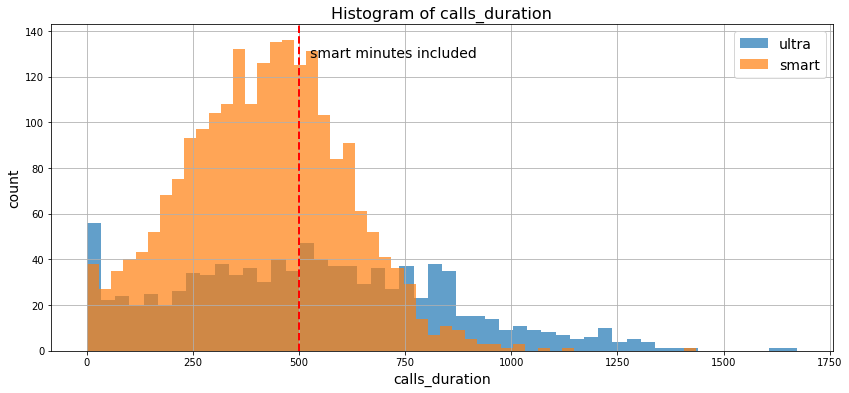

In [45]:
plot_my_hist(df_full, index='tariff', value='calls_duration')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'minutes_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'minutes_included'].iloc[0]*1.05, max_ylim*0.9, 'smart minutes included', fontsize=14)
plt.show()

Довольно большая часть клиентов перерасходует лимит минут звонков на тарифе smart. Лимит на тарифе ultra не будем отображать на графике так как все (или почти все) клиенты укладываются в лимит звонков предоставляюемый тарифом.

#### Построим гистограммы для тарифов по сообщениям

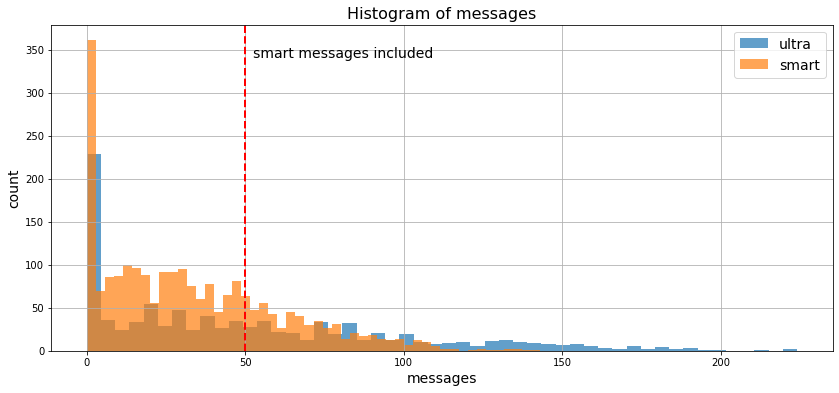

In [46]:
plot_my_hist(df_full, index='tariff', value='messages')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'messages_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'messages_included'].iloc[0]*1.05, max_ylim*0.9, 'smart messages included', fontsize=14)
plt.show()

Довольно большая часть клиентов перерасходует и лимит минут сообщений на тарифе smart. Лимит на тарифе ultra не будем отображать на графике так как все (или почти все) клиенты укладываются в лимит предоставляюемый тарифом.

#### Построим гистограммы для тарифов по сообщениям

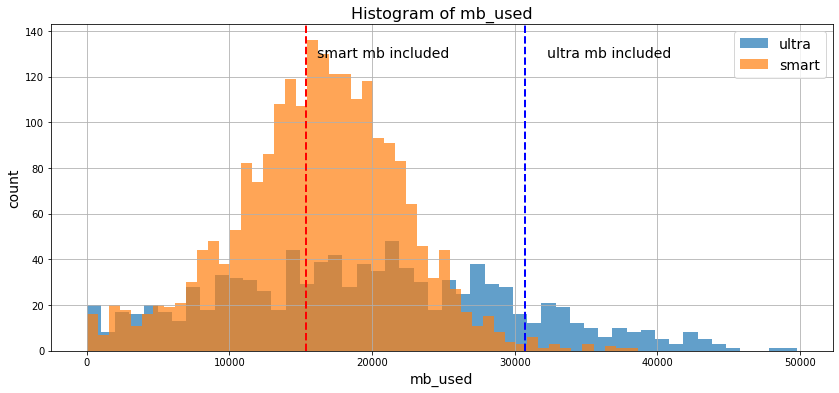

In [47]:
plot_my_hist(df_full, index='tariff', value='mb_used')
min_ylim, max_ylim = plt.ylim()
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].iloc[0], color='r', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'smart', 'mb_per_month_included'].iloc[0]*1.05, max_ylim*0.9, 'smart mb included', fontsize=14)
plt.axvline(df_tariffs.loc[df_tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].iloc[0], color='b', linestyle='dashed', linewidth=2)
plt.text(df_tariffs.loc[df_tariffs['tariff_name'] == 'ultra', 'mb_per_month_included'].iloc[0]*1.05, max_ylim*0.9, 'ultra mb included', fontsize=14)
plt.show()

#### Вывод:
* Пользователи тарифа ultra в среднем больше пользуются всеми услугами связи.
* Разброс по использованию услуг связи на тарифе ultra выше, чем на тарифе smart. Dелика вероятность, что отдельно взятый клиент на тарифе ultra пользуется услугами связи меньше, чем отдельной взятый клиент на тарифе smart. Но нужно отметить, что в выборке пользователей тарифа smart более, чем в 2 раза больше, чем пользователей тарифы ultra, поэтому может быть данные по тарифу ultra менее репрезентативны.
* Видны всплески на графиках около нуля по продолжительности звонков и, особенно, по количеству смс. Заметная часть пользователей пользуется только интернетом.
* Есть заметный перекос вправо на графике использования смс на тарифе ultra, но клиенты укладываются в лимит на тарифе.
* Гистограммы по тарифу smart представляют собой нормальное распределение со скошенностью влево по звонкам и сообщениях.
* Гистограммы по тарифу ultra тоже напоминают нормальное распределение, но разброс значений значительный.
* Клиенты переплачивают за используемый интернет, особенно это заметно на тарифе smart (более половины перерасходует лимит трафика).
* Часть клиентов тарифа smart перерасходуют минуты и сообщения из лимита тарифа.

<a id="testing"></a>
## 4. Проверка гипотез

##### Зададим предварительно уровень статистической значимости по которому будем делать вывод по проверке гипотез

In [48]:
alpha = 0.05 # критический уровень статистической значимости

<a id="tariffs"></a>
### 4.1 Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

* Нулевая гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» РАВНЫ
* Альтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» РАЗЛИЧАЮТСЯ

In [49]:
results = st.ttest_ind(
    df_full.loc[df_full['tariff'] == 'ultra', 'earnings'], 
    df_full.loc[df_full['tariff'] == 'smart', 'earnings'])

print('Средняя выручка пользователей тариф ultra: ', df_full.loc[df_full['tariff'] == 'ultra', 'earnings'].mean())
print('Средняя выручка пользователей тариф smart: ', df_full.loc[df_full['tariff'] == 'smart', 'earnings'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка пользователей тариф ultra:  2060.5299710501267
Средняя выручка пользователей тариф smart:  1233.3494665489009
p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


Средние выручки отличаются почти в 2 раза, а проверка гипотезы показывает, что крайне маловероятно, что выборки по выручке равны: p-value 1 в -190 степени. 

<a id="cities"></a>
### 4.2 Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов различается

* Нулевая гипотеза: средние выручки пользователей Москвы отличается из других регионов РАВНЫ
* Альтернативная гипотеза: средние выручки пользователей Москвы отличается из других регионов РАЗЛИЧАЮТСЯ

In [50]:
results = st.ttest_ind(
    df_full.loc[df_full['city'] == 'Москва', 'earnings'], 
    df_full.loc[df_full['city'] != 'Москва', 'earnings'])

print('Средняя выручка пользователей в Москве:   ', df_full.loc[df_full['city'] == 'Москва', 'earnings'].mean())
print('Средняя выручка пользователей в регионах: ', df_full.loc[df_full['city'] != 'Москва', 'earnings'].mean())

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручка пользователей в Москве:    1507.276761968085
Средняя выручка пользователей в регионах:  1482.0637267996062
p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


При уровне статистической значимости в 5% мы получаем p-value около 0.5, что не даёт нам оснований отвергнуть гипотезу, что выручки пользователей из Москвы и регионов отличаются. При этом средние выручки в Москве и регионах очень близки.

#### Вывод:
* Мы не отвергаем гипозету, что средние выручки пользователей тарифов «Ультра» и «Смарт» РАВНЫ
* У нас нет оснований считать, что выручка пользователей в разных регионах РАЗЛИЧАЮТСЯ

<a id="conclusion"></a>
## 5. Общий вывод

**Мы обработали и проанализировали значения по смс, звонкам и использованному интернет-трафику и сравнили выручку пользователей разных тарифов по месяцам. Построили гистограммы смс, звонкам и использованному интернет-трафику, наложим лимиты тарифов. Определили, что пользователи тарифа smart часто используют весь лимит определённый в тарифе, при этом, учитывая, что выручка пользователей тарифа smart с высокой вероятностью выше, чем пользователей тарифа ultra, то предполагаем, что тариф smart более выгоден для телеком компании**